# Feature extraction and embbeding
_María Camila Vásquez Correa_

### Necessary packages

In [40]:
import numpy as np
import itertools
import pandas as pd
from bhtsne import tsne
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

### Data loading
And normalization!

In [41]:
iris = load_iris().data.T
target = load_iris().target
N = 4
n = 150
# Normalization
for i in range(N):
    iris[i] = iris[i]/np.max(iris[i])
iris = iris.T

## Embbeding
The algorithm to be used is the Barnes-Hut T-sne, with 2 dimensions for visualization

In [42]:
# To preserve the results of the embbeding
random_seed = 42
rng = np.random.RandomState() 
np.random.seed(random_seed)

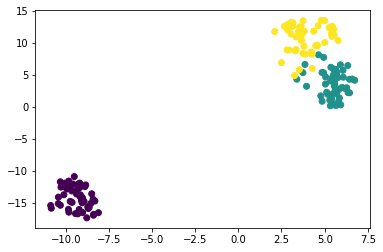

In [43]:
Y = tsne(iris)
plt.scatter(Y[:, 0], Y[:, 1], c=target)
plt.show()

In [44]:
# Save the results for later visualization
pd.DataFrame(Y).to_csv('iris_embbeding.csv', index = False)

## Feature extraction
The features for this dataset include proportions between the sepal and the petal (length and width) and they increment the dimension by 4 (double)

In [45]:
iris1 = pd.DataFrame(iris)
iris1['Proportion1'] = iris1[0]/iris1[1]
iris1['Proportion2'] = iris1[1]/iris1[2]
iris1['Proportion3'] = iris1[2]/iris1[3]
iris1['Proportion4'] = iris1[0]/iris1[3]

In [46]:
# Save the results for later learning
iris1.to_csv('high_dimension_iris.csv', index = False)